In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Tadawul All Share Historical Data.csv')
pd.options.display.max_rows = None
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 23, 2020","5,990.23","6,171.91","6,173.11","5,974.78",190.44M,-2.94%
1,"Mar 22, 2020","6,171.91","6,267.56","6,284.40","6,159.21",165.16M,-1.53%
2,"Mar 19, 2020","6,267.56","6,154.85","6,347.89","6,105.16",359.73M,1.83%
3,"Mar 18, 2020","6,154.85","6,107.05","6,235.30","6,097.61",226.12M,0.78%
4,"Mar 17, 2020","6,107.05","5,959.69","6,182.01","5,971.61",258.60M,2.47%
5,"Mar 16, 2020","5,959.69","6,287.36","6,184.37","5,959.69",253.77M,-5.21%
6,"Mar 15, 2020","6,287.36","6,357.06","6,497.71","6,287.36",211.46M,-1.10%
7,"Mar 12, 2020","6,357.06","6,552.49","6,456.65","6,178.07",255.98M,-2.98%
8,"Mar 11, 2020","6,552.49","6,762.03","6,828.11","6,492.32",282.57M,-3.10%
9,"Mar 10, 2020","6,762.03","6,315.51","6,779.43","6,486.95",345.46M,7.07%


In [3]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-03-23,"5,990.23","6,171.91","6,173.11","5,974.78",190.44M,-2.94%
1,2020-03-22,"6,171.91","6,267.56","6,284.40","6,159.21",165.16M,-1.53%
2,2020-03-19,"6,267.56","6,154.85","6,347.89","6,105.16",359.73M,1.83%
3,2020-03-18,"6,154.85","6,107.05","6,235.30","6,097.61",226.12M,0.78%
4,2020-03-17,"6,107.05","5,959.69","6,182.01","5,971.61",258.60M,2.47%
5,2020-03-16,"5,959.69","6,287.36","6,184.37","5,959.69",253.77M,-5.21%
6,2020-03-15,"6,287.36","6,357.06","6,497.71","6,287.36",211.46M,-1.10%
7,2020-03-12,"6,357.06","6,552.49","6,456.65","6,178.07",255.98M,-2.98%
8,2020-03-11,"6,552.49","6,762.03","6,828.11","6,492.32",282.57M,-3.10%
9,2020-03-10,"6,762.03","6,315.51","6,779.43","6,486.95",345.46M,7.07%


In [4]:
data = df.copy()

In [5]:
data = data.drop(['Change %'], axis=1)

In [6]:
data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = data['Price'].astype(float)
data['Price']

0        5990.23
1        6171.91
2        6267.56
3        6154.85
4        6107.05
5        5959.69
6        6287.36
7        6357.06
8        6552.49
9        6762.03
10       6315.51
11       6846.36
12       7467.52
13       7524.50
14       7556.52
15       7349.19
16       7345.10
17       7628.34
18       7711.12
19       7758.15
20       7747.10
21       7982.95
22       8007.39
23       7967.60
24       7858.93
25       7872.55
26       7836.96
27       7874.41
28       7915.36
29       7895.64
30       7971.93
31       7952.52
32       8053.09
33       8094.36
34       8138.40
35       8112.69
36       8157.51
37       8246.59
38       8185.51
39       8166.08
40       8178.47
41       8326.97
42       8386.35
43       8428.21
44       8445.33
45       8469.71
46       8449.29
47       8459.80
48       8432.56
49       8474.81
50       8441.14
51       8371.13
52       8345.77
53       8124.11
54       8198.97
55       8206.13
56       8193.72
57       8397.01
58       8358.

In [7]:
group = data.groupby('Date')
Real_Price = group['Price'].mean()

In [8]:
Real_Price

Date
2010-02-23     6471.84
2010-02-24     6465.69
2010-02-27     6473.05
2010-02-28     6437.50
2010-03-01     6424.24
2010-03-02     6444.69
2010-03-03     6478.58
2010-03-06     6539.67
2010-03-07     6560.46
2010-03-08     6553.99
2010-03-09     6530.10
2010-03-10     6565.95
2010-03-13     6583.78
2010-03-14     6603.41
2010-03-15     6578.10
2010-03-16     6613.57
2010-03-17     6674.41
2010-03-20     6699.78
2010-03-21     6722.04
2010-03-22     6692.61
2010-03-23     6738.83
2010-03-24     6756.98
2010-03-27     6801.64
2010-03-28     6795.75
2010-03-29     6770.05
2010-03-30     6814.99
2010-03-31     6801.01
2010-04-03     6826.48
2010-04-04     6822.34
2010-04-05     6805.32
2010-04-06     6759.47
2010-04-07     6774.98
2010-04-10     6868.83
2010-04-11     6894.55
2010-04-12     6883.14
2010-04-13     6883.80
2010-04-14     6890.74
2010-04-17     6882.01
2010-04-18     6844.30
2010-04-19     6852.40
2010-04-20     6714.59
2010-04-21     6730.12
2010-04-24     6855.82
2010-0

In [9]:
pred_days = 30

train_data = Real_Price[:len(Real_Price)-pred_days]
test_data = Real_Price[len(Real_Price)-pred_days:]

In [10]:
training_set = train_data.values
training_set = np.reshape(training_set, (len(training_set), 1))
scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)
x_train = training_set[0:len(training_set)-1]
x_train = np.reshape(x_train, (len(x_train), 1, 1))
y_train = training_set[1:len(training_set)]
x_train


array([[[0.19714251]],

       [[0.19608691]],

       [[0.1973502 ]],

       ...,

       [[0.4756346 ]],

       [[0.46855095]],

       [[0.45128894]]])

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(4, input_shape=(None, 1), activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
             loss='mean_squared_error')

In [12]:
model.fit(x_train, 
         y_train,
         epochs=100,
         batch_size=16,
         verbose=2)

Train on 2506 samples
Epoch 1/100
2506/2506 - 1s - loss: 0.2824
Epoch 2/100
2506/2506 - 0s - loss: 0.0687
Epoch 3/100
2506/2506 - 0s - loss: 0.0273
Epoch 4/100
2506/2506 - 0s - loss: 0.0222
Epoch 5/100
2506/2506 - 0s - loss: 0.0208
Epoch 6/100
2506/2506 - 0s - loss: 0.0196
Epoch 7/100
2506/2506 - 0s - loss: 0.0184
Epoch 8/100
2506/2506 - 0s - loss: 0.0170
Epoch 9/100
2506/2506 - 0s - loss: 0.0156
Epoch 10/100
2506/2506 - 0s - loss: 0.0142
Epoch 11/100
2506/2506 - 0s - loss: 0.0128
Epoch 12/100
2506/2506 - 0s - loss: 0.0113
Epoch 13/100
2506/2506 - 0s - loss: 0.0099
Epoch 14/100
2506/2506 - 0s - loss: 0.0086
Epoch 15/100
2506/2506 - 0s - loss: 0.0073
Epoch 16/100
2506/2506 - 0s - loss: 0.0061
Epoch 17/100
2506/2506 - 0s - loss: 0.0050
Epoch 18/100
2506/2506 - 0s - loss: 0.0040
Epoch 19/100
2506/2506 - 0s - loss: 0.0031
Epoch 20/100
2506/2506 - 0s - loss: 0.0024
Epoch 21/100
2506/2506 - 0s - loss: 0.0018
Epoch 22/100
2506/2506 - 0s - loss: 0.0013
Epoch 23/100
2506/2506 - 0s - loss: 9.944

In [13]:
test_set = test_data.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
prediction = model.predict(inputs)
prediction = scaler.inverse_transform(prediction)
prediction

array([[7897.08  ],
       [7917.1226],
       [7875.4985],
       [7837.4204],
       [7873.609 ],
       [7859.761 ],
       [7970.198 ],
       [8010.6035],
       [7985.7876],
       [7746.02  ],
       [7757.261 ],
       [7709.415 ],
       [7625.1865],
       [7337.169 ],
       [7341.3228],
       [7552.1157],
       [7519.5425],
       [7461.5923],
       [6832.65  ],
       [6303.258 ],
       [6747.913 ],
       [6538.3354],
       [6344.3096],
       [6275.4873],
       [5954.9414],
       [6098.4585],
       [6145.241 ],
       [6255.9756],
       [6161.965 ],
       [5984.595 ]], dtype=float32)

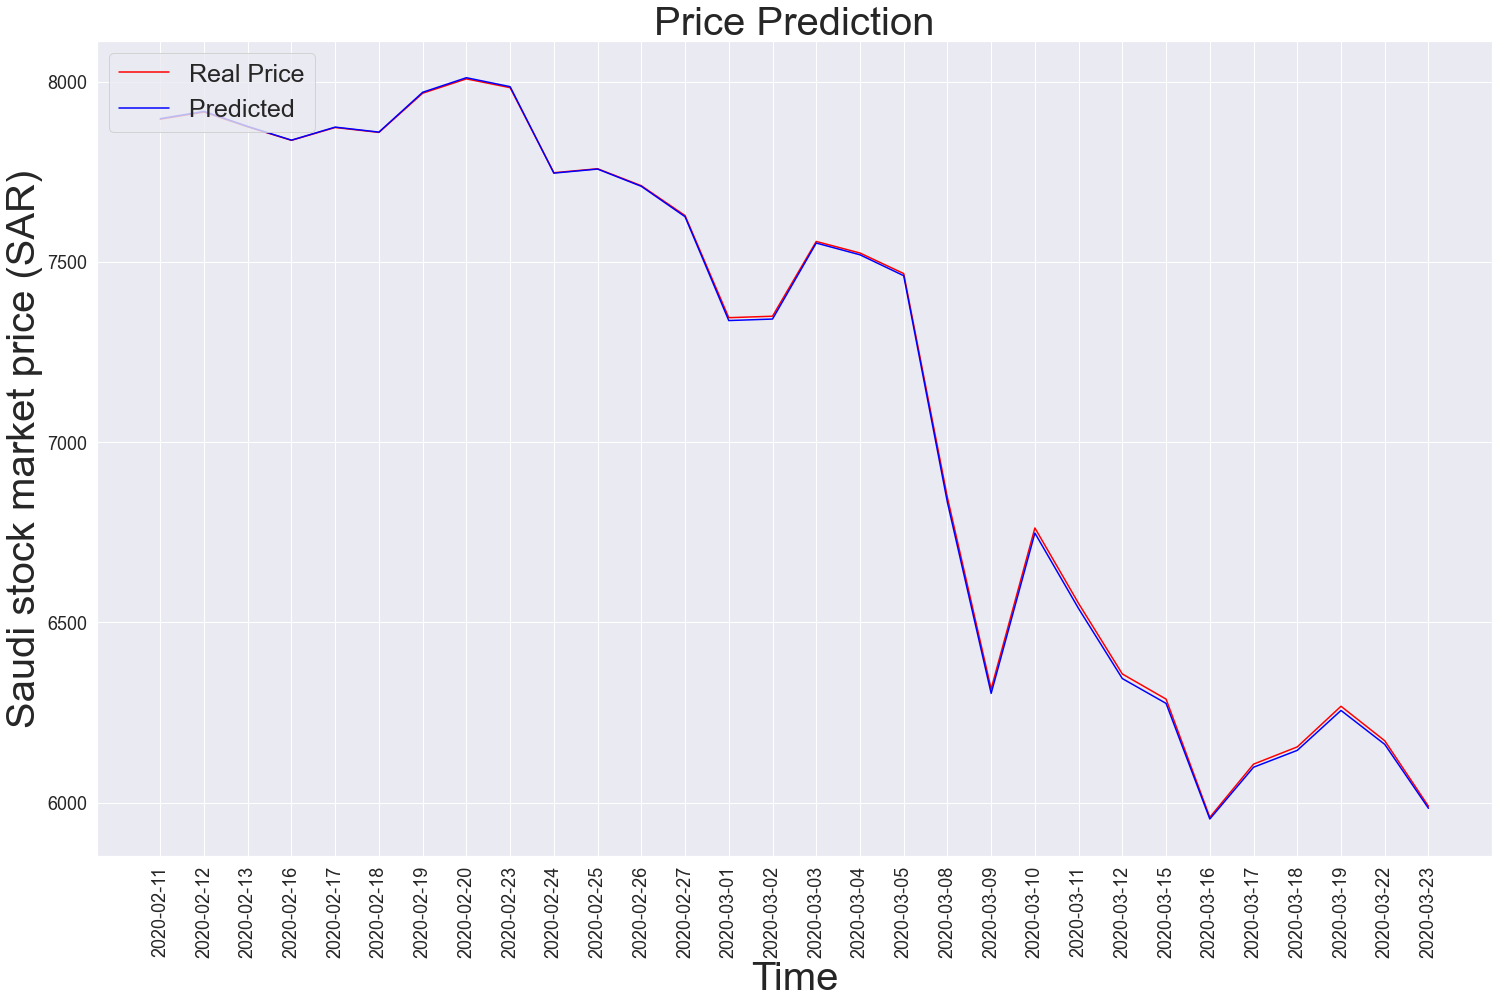

In [14]:
plt.figure(figsize=(25,15)) 
ax = plt.gca() 
plt.plot(test_set, color = 'red', label = 'Real Price')
plt.plot(prediction, color = 'blue', label = 'Predicted ')
plt.title('Price Prediction', fontsize=40)
df_test = test_data.reset_index()
x=df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Saudi stock market price (SAR)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [15]:
test = test_data.values
test = np.reshape(test_set, (len(test_set), 1))
test = scaler.transform(test)
x_test = test[0:len(test)-1]
x_test = np.reshape(x_test, (len(x_test), 1, 1))
y_test = test[1:len(test)]

In [16]:
model.evaluate(x_test, y_test)

29/29 [==============================] - 0s 4ms/sample - loss: 0.0013


0.00134233885910362